# 直流调速系统实验


In [28]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

# 单闭环曲线研究

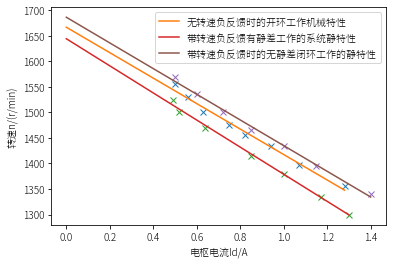

In [36]:
labels=["无转速负反馈时的开环工作机械特性","带转速负反馈有静差工作的系统静特性","带转速负反馈时的无静差闭环工作的静特性"]
for i in range(3):
    df=pd.read_excel('exprData.xlsx',header=None,sheet_name=i)
    Id=df.values[0,1:].tolist()
    n=df.values[2,1:].tolist()
    Id=np.array(Id)[~np.isnan(Id)]
    n=np.array(n)[~np.isnan(n)]
    f=np.polyfit(Id,n,1)
    Idf=np.linspace(0,max(Id),len(Id))
    nf=np.polyval(f,Idf)
    plt.plot(Id,n,'x');
    plt.plot(Idf,nf,label=labels[i])
plt.xlabel('电枢电流Id/A')
plt.ylabel('转速n/(r/min)')
plt.legend()
plt.show()

In [24]:
def fitplot(x,y):
    f=np.polyfit(x,y,1)
    x1=np.linspace(min(x),max(x),10)
    y1=np.polyval(f,x1)
    plt.plot(x,y,'x',x1,y1)
def getData(i):
    df=pd.read_excel('exprData.xlsx',header=None,sheet_name=i)
    x=df.values[1,1:].tolist()
    y=df.values[0,1:].tolist()
    return x,y


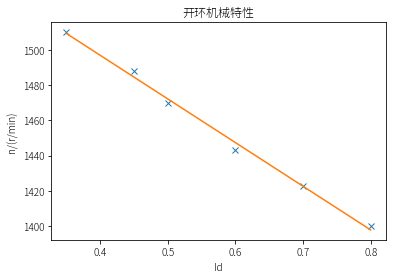

In [25]:
x,y=getData(5)
fitplot(x,y)
plt.title('开环机械特性')
plt.ylabel('n/(r/min)')
plt.xlabel('Id')
plt.show()

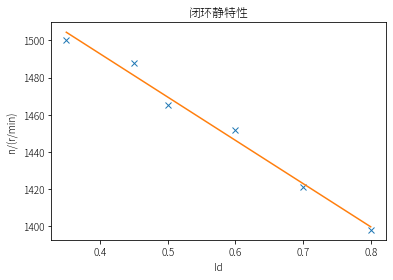

In [26]:
x1,y1=getData(6)
fitplot(x1,y1)
plt.title('闭环静特性')
plt.ylabel('n/(r/min)')
plt.xlabel('Id')
plt.show()

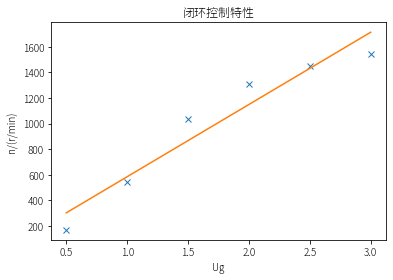

In [27]:
Icl,ncl=getData(7)
fitplot(Icl,ncl)
plt.title('闭环控制特性')
plt.ylabel('n/(r/min)')
plt.xlabel('Ug')
plt.show()